In [ ]:
!pip install numpy

In [ ]:
!pip install opencv-python

In [ ]:
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
DIR="/content/colorize.py"
prot_path="/content/colorization_deploy_v2.prototxt"
point_path="/content/pts_in_hull (4).npy"
caffe_model="/content/drive/MyDrive/Deep learning pro/colorization_release_v2.caffemodel"

In [ ]:
dnn_net = cv2.dnn.readNetFromCaffe(prot_path,caffe_model)
kernel = np.load(point_path)
Id = dnn_net.getLayerId("class8_ab")
Id2 = dnn_net.getLayerId("conv8_313_rh")
kernel = kernel.transpose().reshape(2,313,1,1)
dnn_net.getLayer(Id).blobs = [kernel.astype("float32")]
dnn_net.getLayer(Id2).blobs = [np.full([1,313],2.606,dtype='float32')]

In [ ]:
image = cv2.imread("/content/color img.png")
image = image.astype("float32")/255.0
lab = cv2.cvtColor(image,cv2.COLOR_BGR2LAB)

In [ ]:
resized = cv2.resize(lab,(522,715))
L = cv2.split(resized)[0]
L -= 50

In [ ]:
dnn_net.setInput(cv2.dnn.blobFromImage(L))
ab = dnn_net.forward()[0, :, :, :].transpose((1,2,0))
ab = cv2.resize(ab, (image.shape[1],image.shape[0]))

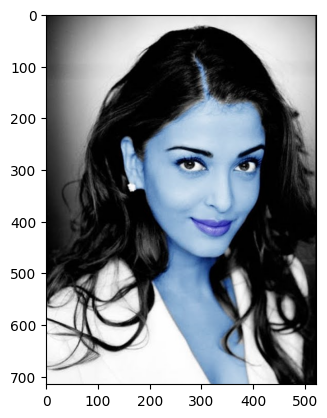

In [ ]:
L= cv2.split(lab)[0]
colorized = np.concatenate((L[:,:,np.newaxis], ab), axis=2)
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2RGB)
colorized = np.clip(colorized, 0, 1)
colorized = (255 * colorized).astype("uint8")
plt.imshow(image)

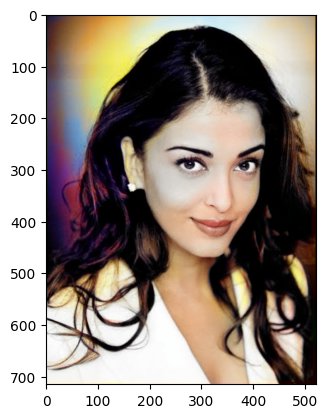

In [ ]:
plt.imshow(colorized)


In [ ]:
from skimage.metrics import structural_similarity as ssim
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err
mse_value = mse(image, colorized)
ssim_value, _ = ssim(image, colorized, full=True, multichannel=True)
print(f"MSE: {mse_value}")
print(f"SSIM: {ssim_value}")

MSE: 63658.762196765674
SSIM: 0.014684339053928852


<ipython-input-137-dcdc770f389c>:7: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value, _ = ssim(image, colorized, full=True, multichannel=True)


In [ ]:
def psnr(imageA, imageB, max_pixel=255.0):
    mse_value = mse(imageA, imageB)
    if mse_value == 0:
        return float('inf')
    return 20 * np.log10(max_pixel) - 10 * np.log10(mse_value)
psnr_value = psnr(image, colorized)
print(f"PSNR: {psnr_value} dB")

PSNR: 0.09222171074610941 dB


In [ ]:
!pip install opencv-python
!pip install face-recognition

In [ ]:
import cv2
import face_recognition
# def find_face_encodings(image_path):
#     image = cv2.imread(image_path)
#     face_enc = face_recognition.face_encodings(image)
#     return face_enc[0]
import face_recognition

def find_face_encodings(image_path):
    image = cv2.imread(image_path)
    face_enc = face_recognition.face_encodings(image)

    if not face_enc:
        return None  # No faces detected in the image
    else:
        return face_enc[0]  # Return the face encoding of the first detected face


In [ ]:
image_1 = find_face_encodings("/content/download (1).png")
image_2  = find_face_encodings("/content/color img.png")

In [ ]:
is_same = face_recognition.compare_faces([image_1], image_2)[0]
print(f"Is Same: {is_same}")
if is_same:
    distance = face_recognition.face_distance([image_1], image_2)
    distance = round(distance[0] * 100)

    accuracy = 100 - round(distance)
    print("The images are same")
    print(f"Accuracy Level: {accuracy}%")
else:
    print("The images are not same")

Is Same: True
The images are same
Accuracy Level: 68%


In [ ]:
!pip install imagehash
from PIL import Image
import imagehash

In [ ]:
# def compare_images(image_path1, image_path2, threshold=10):
#     # Open and hash the images
#     image1 = Image.open(image_path1)
#     image2 = Image.open(image_path2)

#     hash1 = imagehash.phash(image1)
#     hash2 = imagehash.phash(image2)

#     # Calculate the Hamming distance between the hashes
#     hamming_distance = hash1 - hash2

#     # Compare the Hamming distance to a threshold
#     if hamming_distance <= threshold:
#         return True  # Images are considered similar
#     else:
#         return False  # Images are considered dissimilar

# # Paths to the two images you want to compare
# image_path1 = color
# image_path2 = "/content/download (2).png"

# # Compare the images and print the result
# are_similar = compare_images(image_path1, image_path2)

# if are_similar:
#     print("The images are similar.")
# else:
#     print("The images are not similar.")

AttributeError: ignored

In [ ]:
# from PIL import Image
# import imagehash
# import os
# from sklearn.metrics import accuracy_score

# def compare_images(image_path1, image_path2, threshold=10):
#     image1 = Image.open(image_path1)
#     image2 = Image.open(image_path2)

#     hash1 = imagehash.phash(image1)
#     hash2 = imagehash.phash(image2)

#     hamming_distance = hash1 - hash2

#     if hamming_distance <= threshold:
#         return True  # Images are considered similar
#     else:
#         return False  # Images are considered dissimilar

# # Paths to the two image directories with labeled data
# similar_images_dir = colorized
# dissimilar_images_dir = "/content/colo.png"

# # Load images from both directories and label them as similar or dissimilar
# similar_image_paths = [os.path.join(similar_images_dir, filename) for filename in os.listdir(similar_images_dir)]
# dissimilar_image_paths = [os.path.join(dissimilar_images_dir, filename) for filename in os.listdir(dissimilar_images_dir)]

# similar_labels = [1] * len(similar_image_paths)  # Label 1 for similar images
# dissimilar_labels = [0] * len(dissimilar_image_paths)  # Label 0 for dissimilar images

# # Combine the image paths and labels
# image_paths = similar_image_paths + dissimilar_image_paths
# labels = similar_labels + dissimilar_labels

# # Initialize lists to store predictions and true labels
# predictions = []
# true_labels = []

# # Compare the images and make predictions
# for i in range(len(image_paths)):
#     for j in range(i + 1, len(image_paths)):
#         image_path1 = image_paths[i]
#         image_path2 = image_paths[j]

#         are_similar = compare_images(image_path1, image_path2)

#         # Record the predictions and true labels
#         predictions.append(1 if are_similar else 0)
#         true_labels.append(1 if labels[i] == labels[j] else 0)

# # Calculate accuracy based on the labeled data
# accuracy = accuracy_score(true_labels, predictions)

# print(f"Accuracy: {accuracy}")


In [ ]:
# from PIL import Image
# import imagehash
# import os
# from sklearn.metrics import accuracy_score
# import numpy as np
# import io

# def compare_images(image_path1, image_path2, threshold=10):
#     # Convert NumPy arrays to PIL images
#     image1 = Image.fromarray(image_path1)
#     image2 = Image.fromarray(image_path2)

#     hash1 = imagehash.phash(image1)
#     hash2 = imagehash.phash(image2)

#     hamming_distance = hash1 - hash2

#     if hamming_distance <= threshold:
#         return True  # Images are considered similar
#     else:
#         return False  # Images are considered dissimilar
# similar_images_dir = colorized
# dissimilar_images_dir = "/content/colo.png"


# # Load images from both directories and label them as similar or dissimilar
# similar_image_paths = [os.path.join(similar_images_dir, filename) for filename in os.listdir(similar_images_dir)]
# dissimilar_image_paths = [os.path.join(dissimilar_images_dir, filename) for filename in os.listdir(dissimilar_images_dir)]

# similar_labels = [1] * len(similar_image_paths)  # Label 1 for similar images
# dissimilar_labels = [0] * len(dissimilar_image_paths)  # Label 0 for dissimilar images

# # Combine the image paths and labels
# image_paths = similar_image_paths + dissimilar_image_paths
# labels = similar_labels + dissimilar_labels

# # Initialize lists to store predictions and true labels
# predictions = []
# true_labels = []

# # Compare the images and make predictions
# for i in range(len(image_paths)):
#     for j in range(i + 1, len(image_paths)):
#         image_path1 = np.array(Image.open(image_paths[i]))
#         image_path2 = np.array(Image.open(image_paths[j]))

#         are_similar = compare_images(image_path1, image_path2)

#         # Record the predictions and true labels
#         predictions.append(1 if are_similar else 0)
#         true_labels.append(1 if labels[i] == labels[j] else 0)

# # Calculate accuracy based on the labeled data
# accuracy = accuracy_score(true_labels, predictions)

# print(f"Accuracy: {accuracy}")


In [ ]:
# import imagehash
# import os
# from sklearn.metrics import accuracy_score
# import numpy as np
# import cv2

# def compare_images(image1, image2, threshold=10):
#     # Convert images to grayscale (if not already)
#     if len(image1.shape) == 3:
#         image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
#     if len(image2.shape) == 3:
#         image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

#     # Compute perceptual hashes
#     hash1 = imagehash.average_hash(Image.fromarray(image1))
#     hash2 = imagehash.average_hash(Image.fromarray(image2))

#     # Calculate the Hamming distance between the hashes
#     hamming_distance = hash1 - hash2

#     if hamming_distance <= threshold:
#         return True  # Images are considered similar
#     else:
#         return False  # Images are considered dissimilar

# # Paths to the two image directories with labeled data
# similar_images_dir = "/content/download (1).png"
# dissimilar_images_dir = "/content/color img.png"
# similar_image_paths = [os.path.join(similar_images_dir, filename) for filename in os.listdir(similar_images_dir)]
# dissimilar_image_paths = [os.path.join(dissimilar_images_dir, filename) for filename in os.listdir(dissimilar_images_dir)]

# similar_labels = [1] * len(similar_image_paths)  # Label 1 for similar images
# dissimilar_labels = [0] * len(dissimilar_image_paths)  # Label 0 for dissimilar images

# # Combine the image paths and labels
# image_paths = similar_image_paths + dissimilar_image_paths
# labels = similar_labels + dissimilar_labels

# # Initialize lists to store predictions and true labels
# predictions = []
# true_labels = []

# # Compare the images and make predictions
# for i in range(len(image_paths)):
#     for j in range(i + 1, len(image_paths)):
#         image_path1 = cv2.imread(image_paths[i])
#         image_path2 = cv2.imread(image_paths[j])

#         are_similar = compare_images(image_path1, image_path2)

#         # Record the predictions and true labels
#         predictions.append(1 if are_similar else 0)
#         true_labels.append(1 if labels[i] == labels[j] else 0)

# # Calculate accuracy based on the labeled data
# accuracy = accuracy_score(true_labels, predictions)

# print(f"Accuracy: {accuracy}")


NotADirectoryError: ignored